In [1]:
import random
import numpy as np
import sys 
import csv
from scipy import stats
sys.path.append('..')
import math

from prior import prior
from liklihood import liklihood
from posterior import posterior
import graph_image_generator
import utilities
import matplotlib.pyplot as plt
from matplotlib import rc
import pylab as pl

[0.05316901 0.05316901 0.07007042 0.05316901 0.05316901 0.05316901
 0.05316901 0.05880282 0.07570423 0.05035211 0.09260563 0.07570423
 0.09260563 0.05316901 0.05316901 0.05880282]
hello


In [ ]:
# Create an artifical set of observations
no_of_observations = 100
min_graph_size = [1,1] # This is read as the minimum number of pos arguments is 1 and the maximum is 1
max_graph_size = [3,3] 

## Measuring Diversion 

We first need to define what it means to add noise to probability distribution. We know that the distributions differ primarily in terms of rating. A perfectly coherent distribution is thus one which is conforms to the distribution. i.e one in which the dataset is distributed according to the prior.


In [ ]:
target_distribution = {}
target_distribution['pos_args'] = ['a','b']
target_distribution['neg_args'] = ['c']
target_distribution['rating'] = 10

p_G = prior(target_distribution['pos_args'], target_distribution['neg_args'])

# generate the prior distribution
target_prior_distribution = p_G.getDistribution(target_distribution['rating'])

In [ ]:
# Generate the dataset
# Start with the matching rating and matching graph space and closest distribution

In [ ]:
dataset_rating = target_distribution['rating']
graph_space_pos_args  = target_distribution['pos_args']
graph_space_neg_args = target_distribution['neg_args']

In [ ]:
observations = []

for graph in p_G.arg_matrices:
    observation = {}
    observation['pos_args'] = target_distribution['pos_args']
    observation['neg_args'] = target_distribution['neg_args']
    observation['rating'] = target_distribution['rating']
    observation['attacks'] = utilities.convertArgMtrxToAttacks(observation['pos_args'], 
                                                               observation['neg_args'],
                                                              graph)
    
    observations.append(observation)
    



In [ ]:
target_quantities = (np.array(target_prior_distribution) * 100).astype(int)

In [ ]:
synthetic_dataset = []
for idx, observation in enumerate(observations):
    synthetic_dataset.extend([observation]*1)

In [ ]:
# Now construct posterior iteratively 
p_G.rating = 10
all_updates_distribution = []

current_prior = target_prior_distribution

for synthetic_observation in synthetic_dataset:

    p_G_T = liklihood(p_G, synthetic_observation)
    liklihood_distribution = p_G_T.buildLiklihoodDistribution()
    
    p_T_G = posterior(current_prior, liklihood_distribution)
    posterior_distribution = p_T_G.buildPosteriorDistribution()
    
    all_updates_distribution.append(posterior_distribution)
    
    current_prior = posterior_distribution

In [ ]:
current_prior

In [ ]:
target_prior_distribution

# Attacks that are always true

In [ ]:
# Want to know what we are checking for. Want to check that some long standing patterns are captured. So if a particular
# graph structure always holds true as well as the extension holding true.
always_true = [[('a','c')]]

In [5]:
def check_attack_holds(pos_args, neg_args, always_true, graph):
    
    all_args = pos_args + neg_args
    appropriate_graph = []
    
    for t in always_true:
        
        if t[0][0] not in all_args or t[0][1] not in all_args:
            appropriate_graph.append(False)
            continue
            
        attacker = all_args.index(t[0][0])
        attacked = all_args.index(t[0][1])
        
        if len(t) == 1:
            if graph[attacker, attacked] == 1 and graph[attacked, attacker] == 0:
                appropriate_graph.append(True)
            else:
                appropriate_graph.append(False)
            continue
            
        if len(t) == 2:
            if graph[attacker, attacked] == 1 and graph[attacked, attacker] == 1:
                appropriate_graph.append(True)
            else:
                appropriate_graph.append(False)
            continue
            
    return all(appropriate_graph)

In [9]:
p_G_2args = prior(['a'], ['c'])
p_G_2args_prior_distribution =  p_G_2args.getDistribution(target_distribution['rating'])

p_G_3args = prior(['a','b'], ['c'])
p_G_3args_prior_distribution =  p_G_3args.getDistribution(target_distribution['rating'])

p_G_3args_2 = prior(['a','d'], ['c'])
p_G_3args_2_prior_distribution =  p_G_3args_2.getDistribution(target_distribution['rating'])

p_G_4args = prior(['a','d','b'], ['c'])
p_G_4args_prior_distribution =  p_G_4args.getDistribution(target_distribution['rating'])

In [10]:
target_no_observations = 2

all_p_g = [p_G_2args, p_G_3args, p_G_3args_2, p_G_4args]
all_prior_distribs = [p_G_2args_prior_distribution, 
                     p_G_3args_prior_distribution,
                     p_G_3args_2_prior_distribution,
                     p_G_4args_prior_distribution]
index_p_G_s = list(range(len(all_p_g)))

In [ ]:
target_distribution

In [ ]:
observations = []

while len(observations) <=target_no_observations:
    choice = random.choice(index_p_G_s)
    chosen_prior = all_prior_distribs[choice]
    
    possible_graphs = []
    possible_graphs_probabilities = []
    for graph_no, graph in enumerate((all_p_g[choice]).arg_matrices):
        if check_attack_holds(all_p_g[choice].pos_args, all_p_g[choice].neg_args, always_true, graph):            
            possible_graphs.append(graph)
            possible_graphs_probabilities.append(chosen_prior[graph_no])
        
    
    possible_graphs_probabilities = possible_graphs_probabilities / np.sum(possible_graphs_probabilities)
    
    indices = list(range(len(possible_graphs_probabilities)))
    custm = stats.rv_discrete(name='custm', values=(indices, possible_graphs_probabilities))
    chosen_graph = custm.rvs(size=1)[0]
    
    
    observation = {}
    observation['pos_args'] = all_p_g[choice].pos_args
    observation['neg_args'] = all_p_g[choice].neg_args
    observation['attacks'] = utilities.convertArgMtrxToAttacks(observation['pos_args'], 
                                                               observation['neg_args'],
                                                              possible_graphs[chosen_graph])
    
    observation['rating'] = 10
    observations.append(observation)

# 3 arg target distribution

In [2]:
target_distribution = {}
target_distribution['pos_args'] = ['a','b']
target_distribution['neg_args'] = ['c']
target_distribution['rating'] = 10

p_G = prior(target_distribution['pos_args'], target_distribution['neg_args'])

# generate the prior distribution
target_prior_distribution = p_G.getDistribution(target_distribution['rating'])

p_G.rating = 10
all_updates_distribution = []

current_prior = target_prior_distribution

for synthetic_observation in observations:

    p_G_T = liklihood(p_G, synthetic_observation)
    liklihood_distribution = p_G_T.buildLiklihoodDistribution()
    
    p_T_G = posterior(current_prior, liklihood_distribution)
    posterior_distribution = p_T_G.buildPosteriorDistribution()
    
    all_updates_distribution.append(posterior_distribution)
    
    current_prior = posterior_distribution

NameError: name 'observations' is not defined

In [ ]:
# plot a bar chart

In [ ]:
b1 = target_prior_distribution
b2 = current_prior
x = np.array(list(range(16)))
fig = plt.figure()
plt.bar(left=x-0.2, width=0.2, height=b1 ,color='k', label='prior')
plt.bar(left=x, width=0.2, height=b2, color='r', label = 'posterior')
plt.xticks(list(range(16)),
           [r'$a \rightarrow b \leftarrow c$',
           r'$a \rightarrow b \leftrightarrow c$',
           r'$a \leftrightarrow b \leftarrow c$',
           r'$a \quad b \leftarrow c$',
           r'$a \rightarrow b \quad c$',
           r'$a \leftarrow b \leftarrow c$',
           r'$a \rightarrow b \rightarrow c$',
           r'$a \quad b \leftrightarrow c$',
           r'$a \leftrightarrow b \quad c$',
           r'$a \quad b \quad c$',
           r'$a \leftrightarrow b \leftrightarrow c$',
           r'$a \leftarrow b \leftrightarrow c$',
           r'$a \leftrightarrow b \rightarrow c$',
           r'$a \quad b \rightarrow c$',
           r'$a \leftarrow b \quad c$',
           r'$a \leftarrow b \rightarrow c$'], rotation='vertical')

plt.ylabel('P(G)')
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('3_arg_full_consistent.png')

In [ ]:
current_prior

In [ ]:
target_distribution = {}
target_distribution['pos_args'] = ['a']
target_distribution['neg_args'] = ['c']
target_distribution['rating'] = 10

p_G = prior(target_distribution['pos_args'], target_distribution['neg_args'])

# generate the prior distribution
target_prior_distribution = p_G.getDistribution(target_distribution['rating'])

p_G.rating = 10
all_updates_distribution = []

current_prior = target_prior_distribution

for synthetic_observation in observations:

    p_G_T = liklihood(p_G, synthetic_observation)
    liklihood_distribution = p_G_T.buildLiklihoodDistribution()
    
    p_T_G = posterior(current_prior, liklihood_distribution)
    posterior_distribution = p_T_G.buildPosteriorDistribution()
    
    all_updates_distribution.append(posterior_distribution)
    
    current_prior = posterior_distribution

In [ ]:
current_prior

In [ ]:
b1 = target_prior_distribution
b2 = current_prior
x = np.array(list(range(4)))
fig = plt.figure()
plt.bar(left=x-0.2, width=0.2, height=b1 ,color='k', label='prior')
plt.bar(left=x, width=0.2, height=b2, color='r', label = 'posterior')
plt.xticks(list(range(4)),
           [r'$a \rightarrow b$',
           r'$a \leftrightarrow b$',
           r'$a \quad b$',
           r'$a \leftarrow b$'], rotation='vertical')

plt.ylabel('P(G)')
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('2_arg_full_consistent.png')

# Run experiment and see how well we capture attacks which appear with varying degrees of 

In [3]:
always_true = [[('a','c')],[('c', 'b')]]
degree_of_appearance = [0] # means it appears 60 % of the time

In [4]:
def generateSyntheticObservations(target_no_observations, all_p_g, all_prior_distribs, degree_of_appearance, always_true):

    observations = []
    index_p_G_s = list(range(len(all_p_g)))

    while len(observations) < target_no_observations:
        choice = random.choice(index_p_G_s) # choose an index from the list, index corresponds to one of the graph spaces
        chosen_prior = all_prior_distribs[choice] # store the prior for the graph space


        possible_graphs = []
        possible_graphs_probabilities = []

        appear_draw = random.uniform(0, 1)
        if appear_draw <= degree_of_appearance:
            for graph_no, graph in enumerate((all_p_g[choice]).arg_matrices):
                result = check_attack_holds(all_p_g[choice].pos_args, all_p_g[choice].neg_args, always_true, graph)
                if result:            
                    possible_graphs.append(graph)
                    possible_graphs_probabilities.append(chosen_prior[graph_no])

            if len(possible_graphs) ==0:
                continue
            possible_graphs_probabilities = possible_graphs_probabilities / np.sum(possible_graphs_probabilities)

        else:
            possible_graphs = (all_p_g[choice]).arg_matrices
            possible_graphs_probabilities = chosen_prior


        indices = list(range(len(possible_graphs_probabilities)))
        custm = stats.rv_discrete(name='custm', values=(indices, possible_graphs_probabilities))
        chosen_graph = custm.rvs(size=1)[0]

        observation = {}
        observation['pos_args'] = all_p_g[choice].pos_args
        observation['neg_args'] = all_p_g[choice].neg_args
        observation['attacks'] = utilities.convertArgMtrxToAttacks(observation['pos_args'], 
                                                                   observation['neg_args'],
                                                                  possible_graphs[chosen_graph])

        observation['rating'] = 10

        observations.append(observation)
        

    return observations
    

In [ ]:
observations = generateSyntheticObservations(50, all_p_g, all_prior_distribs, 1, always_true)

In [ ]:
target_distribution = {}
target_distribution['pos_args'] = ['a','b']
target_distribution['neg_args'] = ['c']
target_distribution['rating'] = 10

p_G = prior(target_distribution['pos_args'], target_distribution['neg_args'])

# generate the prior distribution
target_prior_distribution = p_G.getDistribution(target_distribution['rating'])

p_G.rating = 10
all_updates_distribution = []

current_prior = target_prior_distribution

for synthetic_observation in observations[0:50]:

    p_G_T = liklihood(p_G, synthetic_observation)
    liklihood_distribution = p_G_T.buildLiklihoodDistribution()
    
    p_T_G = posterior(current_prior, liklihood_distribution)
    posterior_distribution = p_T_G.buildPosteriorDistribution()
    
    all_updates_distribution.append(posterior_distribution)
    
    current_prior = posterior_distribution
    
    
b1 = target_prior_distribution
b2 = current_prior
x = np.array(list(range(16)))
fig = plt.figure()
plt.bar(left=x-0.2, width=0.2, height=b1 ,color='k', label='prior')
plt.bar(left=x, width=0.2, height=b2, color='r', label = 'posterior')
plt.xticks(list(range(16)),
           [r'$a \rightarrow b \leftarrow c$',
           r'$a \rightarrow b \leftrightarrow c$',
           r'$a \leftrightarrow b \leftarrow c$',
           r'$a \quad b \leftarrow c$',
           r'$a \rightarrow b \quad c$',
           r'$a \leftarrow b \leftarrow c$',
           r'$a \rightarrow b \rightarrow c$',
           r'$a \quad b \leftrightarrow c$',
           r'$a \leftrightarrow b \quad c$',
           r'$a \quad b \quad c$',
           r'$a \leftrightarrow b \leftrightarrow c$',
           r'$a \leftarrow b \leftrightarrow c$',
           r'$a \leftrightarrow b \rightarrow c$',
           r'$a \quad b \rightarrow c$',
           r'$a \leftarrow b \quad c$',
           r'$a \leftarrow b \rightarrow c$'], rotation='vertical')

plt.ylabel('P(G)')
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('3_arg_full_consistent_6.png')

In [340]:
graph_probabilities_dict = {}

In [341]:
noObservations = 25
appearance = 0.8
graph_probabilities = []
for i in range(150):
    observations = generateSyntheticObservations(noObservations, all_p_g, all_prior_distribs, appearance, always_true)

    target_distribution = {}
    target_distribution['pos_args'] = ['a','b']
    target_distribution['neg_args'] = ['c']
    target_distribution['rating'] = 10

    p_G = prior(target_distribution['pos_args'], target_distribution['neg_args'])

    # generate the prior distribution
    target_prior_distribution = p_G.getDistribution(target_distribution['rating'])

    p_G.rating = 10
    all_updates_distribution = []

    current_prior = target_prior_distribution

    for synthetic_observation in observations:

        p_G_T = liklihood(p_G, synthetic_observation)
        liklihood_distribution = p_G_T.buildLiklihoodDistribution()

        p_T_G = posterior(current_prior, liklihood_distribution)
        posterior_distribution = p_T_G.buildPosteriorDistribution()

        all_updates_distribution.append(posterior_distribution)

        current_prior = posterior_distribution


    graph_probabilities.append(current_prior[6])



In [335]:
graph_probabilities_dict[int(appearance*10)] = graph_probabilities

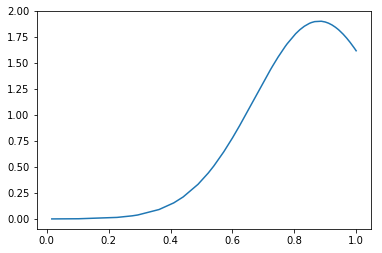

In [336]:
h = sorted(graph_probabilities_dict[int(appearance*10)])  #sorted
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

plt.plot(h,fit)
      #use this to draw histogram of your data

    
plt.show()

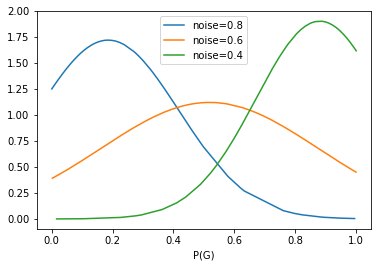

In [337]:
fig = plt.figure()

plt.xlabel('P(G)')

for key, item in graph_probabilities_dict.items():
    if key == 0:
        continue 
    if not (key/2).is_integer():
        continue
    h = sorted(item)

    fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

    noise_level = round(1 - key/10, 1)
    
    plt.plot(h,fit, label='noise='+ str(noise_level))
      #use this to draw histogram of your data
    plt.legend()
plt.show()

In [338]:
fig.savefig('big_simulations_evennoises_25observations_150trials.jpeg')

In [255]:
graph_probabilities_dict

{1: [0.010079824147044175,
  0.0228948422233452,
  0.0027297027567565247,
  0.08740234232867028,
  0.2037761242496201,
  0.009821706111044834,
  0.03154905200091744,
  0.060080905076898714,
  0.023401059269937952,
  0.01569938230972048,
  0.13374933425584426,
  0.001631184541132564,
  0.2143833849024954,
  0.08307941264033213,
  0.044169273684777605,
  0.16000730393255624,
  0.04380778013202786,
  0.013933419535666321,
  0.02142049583678199,
  0.0472421975588401,
  0.03654557079057574,
  0.0055149290379320134,
  0.09478797062241479,
  0.0318927928536235,
  0.22568930090235653,
  0.0013722479796640435,
  0.08870362402792914,
  0.00954827111365276,
  0.019452722978568964,
  0.021364846161455214,
  0.07369485509261604,
  0.30178371340315885,
  0.014337417699126073,
  0.13293956396616138,
  0.1162171868691922,
  0.06442582054976796,
  0.3145138517254528,
  0.14240377386266762,
  0.026997811023351415,
  0.012858506369686006,
  0.07327362339312375,
  0.011966939662813422,
  0.055630824559754

In [ ]:
import json

with open('simulations.json', 'w') as fp:
    json.dump(graph_probabilities_dict, fp)

In [ ]:
with open('simulations.json', 'r') as fp:
    data = json.load(fp)

# Diagrams for Paper 1

In [ ]:
agg_distances = np.array([0,
                1,
                0,
                0,
                0,
                1,
                0,
                0,
                1,
                1,
                0,
                1,
                0,
                1,
                1,
                1,
                1,
                0,
                2,
                1,
                0,
                0,
                4,
                0,
                1,
                4,
                0,
                3,
                2])

probabilities = np.array([0,
                          2,
                          0,
                          0,
                          0,
                          16,
                          0,
                          0,
                          3,
                          13,
                          0,
                          8,
                          0,
                          8,
                          20,
                          7,
                          7,
                          0,
                          10,
                          2,
                          0,
                          0,
                          1,
                          0,
                          1,
                          4,
                          0,
                          1,
                          0])

probabilities = probabilities/100

In [ ]:
hamms = [1,
        0,
        0,
        0,
        1,]

In [94]:
set(observations[0]['attacks'])
[a[0] for a in always_true]

[('a', 'c'), ('c', 'b')]

In [ ]:
len(probabilities)

In [ ]:
x = np.array(list(range(len(agg_distances))))
# s1 = np.sin(2 * np.pi * t)
# s2 = np.exp(-t)
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 3))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.1)

# Plot each graph, and manually set the y tick values
axs[0].bar(left=x,height=agg_distances, width=0.3, label=r'$|\mathsf{Agg}(G) - \mathsf{Agg}(\hat{G})| \times \frac{1}{\Delta Att}$')
axs[0].legend(loc="upper left")

axs[1].bar(left=x,height=probabilities, width=0.3, color='r' ,label=r'$|P(G)-P(\hat{G})|$')
axs[1].legend(loc="upper left")

plt.xticks(x)
plt.show()

fig.savefig('experiment_summary.png')

In [ ]:
!ls

In [57]:
fit.cumsum()[900]

IndexError: index 900 is out of bounds for axis 0 with size 150

In [ ]:
scipy.stats.norm(0, 1).pdf(0)

In [ ]:
stats.norm(0, 1)dd

In [44]:
graph_probabilities

[1.4913143758792117e-05,
 2.2235367056029284e-07,
 0.0005464781814768962,
 0.0004924947735694501,
 0.00012868387101531726,
 1.1431800669266425e-07,
 8.046842013790496e-06,
 2.471458921540744e-08,
 3.975537206472785e-05,
 6.713629163940735e-08,
 3.296393600774172e-07,
 0.0005560639691923066,
 4.108418008656976e-06,
 0.0006426722362315618,
 3.70218619225018e-09,
 0.0018847925873243456,
 0.003300421813348656,
 0.00030602628446003315,
 0.0023880466720816907,
 4.037035620802453e-06,
 0.000878451170387018,
 0.007081937133874659,
 0.0013549168740958066,
 1.2125823118109425e-05,
 1.2341070307189475e-07,
 2.713244637287414e-06,
 0.00030577848231041604,
 1.0331521727117878e-05,
 0.00437337931239228,
 2.8649725679584667e-07,
 2.157566206488054e-05,
 0.005258453829522051,
 8.48531489650021e-07,
 0.009985316011718053,
 0.0001707013987556524,
 3.671149306638443e-06,
 6.841107824717106e-05,
 0.00016604149981788624,
 0.0002459250894459463,
 1.3919663848957796e-05,
 0.0010018406249588303,
 0.0005995131